<a href="https://colab.research.google.com/github/kartof0nix/MdCS-XIII-labolatoria/blob/main/Karol%20Bonat%20lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from matplotlib import pyplot as plt

In [3]:
def frange(st, end, tick):
  res = []
  while(st <= end):
    res.append(st)
    st += tick
    st = round(st, 12)
  return res

frange(1, 3, 0.1)

[1,
 1.1,
 1.2,
 1.3,
 1.4,
 1.5,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.3,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0]

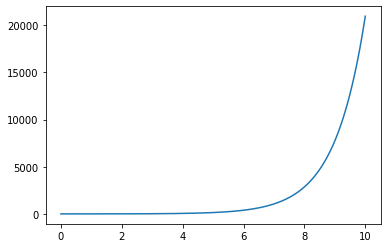

In [4]:
k = 1
n0 = 1

t_dt = 0.01
t_max = 10

t = [0]
n = [n0]

while(t[-1] < t_max):
  t.append( round(t[-1] + t_dt, 12) )
  n.append( n[-1] + (n[-1]*k) * t_dt )

plt.plot(t, n)

plt.show()


Zadanie 2.0.1 

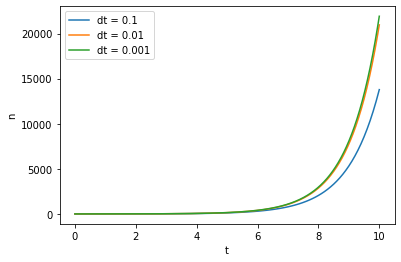

In [5]:
k = 1
n0 = 1

t_max = 10

for t_dt in [0.1, 0.01, 0.001]:
  t = [0]
  n = [n0]

  while(t[-1] < t_max):
    t.append( round(t[-1] + t_dt, 12) )
    n.append( n[-1] + (n[-1]*k) * t_dt )

  plt.plot(t, n)

plt.legend(["dt = 0.1", "dt = 0.01", "dt = 0.001"])
plt.xlabel("t")
plt.ylabel("n")
plt.show()

 (z rozwiązaniem analitycznym )


In [6]:
import math

math.exp(1)

2.718281828459045

100001
100001
100001


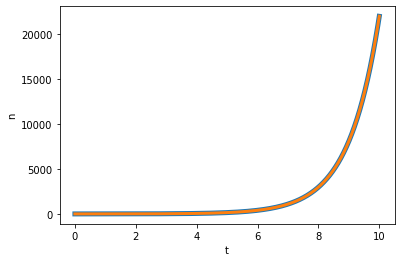

In [7]:

k = 1
n0 = 1

t = [0]
n = [n0]
n_anal = [n0]

t_max = 10
t_dt = 0.0001

while(t[-1] < t_max):
  t.append(t[-1] + t_dt )
  t[-1] = round(t[-1], 6)
  n.append(n[-1] + (k * n[-1]) * t_dt )
  n_anal.append(n0 * math.exp (k*t[-1]) )

print(len(t))
print(len(n))
print(len(n_anal))

plt.plot(t, n, linewidth = 5)
plt.plot(t, n_anal, linewidth=3)


plt.xlabel("t")
plt.ylabel("n")
plt.show()

Zadanie 2.0.2

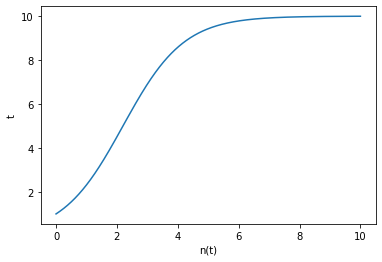

In [8]:
class SymulacjaLogistyczna:
  dt = 0.001
  def __init__(self, k, N, n0):
    self.k = k
    self.N = N
    self.n = [n0]
    self.t = [0]

  def next_tick(s):
    s.t.append( round ( s.t[-1] + s.dt, 12 ) )
    s.n.append( s.n[-1] + ( s.k * s.n[-1] * (1 - s.n[-1] / s.N) ) * s.dt ) 

  def simulate(self, t_max):
    while ( self.t[-1] < t_max ):
      self.next_tick()
    

krol = SymulacjaLogistyczna(1, 10, 1)
krol.simulate(10)

#print(krol.t, krol.n, sep = '\n')

plt.plot(krol.t, krol.n)
plt.xlabel("n(t)")
plt.ylabel("t")

plt.show()

Zadanie 2.0.3

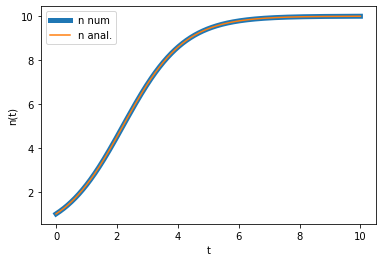

In [9]:
k = 1
N = 10

n0 = 1
def f_n(t):
  return N / ( 1 - (1 - N / n0) * math.e ** (-k * t) )

t_anal = frange(0, 10, 0.001)
n_anal = [f_n(t) for t in t_anal]

plt.plot(krol.t, krol.n, linewidth = 5)
plt.plot(t_anal, n_anal)

plt.legend(["n num", "n anal."])

plt.xlabel('t')
plt.ylabel('n(t)')

plt.show()

Zadanie 2.0.4

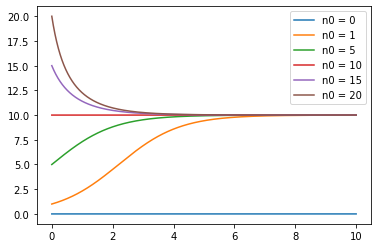

In [10]:
class SymulacjaLogistyczna:
  dt = 0.001
  def __init__(self, k, N, n0):
    self.k = k
    self.N = N
    self.n = [n0]
    self.t = [0]

  def next_tick(s):
    s.t.append( round ( s.t[-1] + s.dt, 12 ) )
    s.n.append( s.n[-1] + ( s.k * s.n[-1] * (1 - s.n[-1] / s.N) ) * s.dt ) 

  def simulate(self, t_max):
    while ( self.t[-1] < t_max ):
      self.next_tick()

legenda = []
for n0 in ([0, 1] + list(range(5, 21, 5))):
  sym = SymulacjaLogistyczna(1, 10, n0)
  sym.simulate(10)
  plt.plot(sym.t, sym.n)
  legenda.append( "n0 = " + str(n0) )

plt.legend(legenda)
plt.show()

Zadanie 3.0.1

Przybliżenie szukanego k : 100000.0


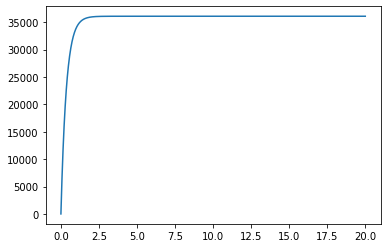

In [ ]:
class SymulacjaWirusa:
  dt = 0.01
  def __init__(self, k, m, V0):
    self.k = k
    self.m = m
    self.v = [V0]
    self.t = [0]

  def next_tick(self):
    self.t.append( round ( self.t[-1] + self.dt, 12 ) )
    self.v.append( self.v[-1] + (self.k - self.m * self.v[-1]) * self.dt ) 

  def simulate(self, t_max):
    while ( self.t[-1] < t_max ):
      self.next_tick()


m = 2.77

#time for BINSEARCZ!!

szuk_poz = 300000
st, end = 0, 100000

while(end - st > 0.00001):

  bin_k = (st + end) / 2
  HIV = SymulacjaWirusa(bin_k, m, 0)
  HIV.simulate(20)

  if(HIV.v[-1] < szuk_poz):
    st = bin_k
  else:
    kon = bin_k


print("Przybliżenie szukanego k : " + str(round(st, 4)))
HIV = SymulacjaWirusa(bin_k, m, 0)
HIV.simulate(20)

plt.plot(HIV.t, HIV.v)

plt.show()



